<a href="https://colab.research.google.com/github/z0rus26/taller1/blob/master/taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import pandas as pd
pd.__version__
import numpy as np
import datetime

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

import numpy
numpy.__version__

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'1.18.5'

LLamo al archivo CSV (GIt) de los datos del sensor IOT a calibrar. Fecha: 2019/08/01 5:00 am to 2019/08/31 ≈ 1 mes de datos, 24 muestras al día.
Total numero de puntos 24h aproximadamente*31= 740.



In [ ]:
url1 = 'https://raw.githubusercontent.com/z0rus26/taller1/master/data_iot.csv'
df_x = pd.read_csv(url1,sep=';',index_col='FECHA_X', parse_dates=True)
df_x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 740 entries, 2019-08-31 23:03:00.226000+00:00 to 2019-08-01 05:02:50.206000+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Valor_X  740 non-null    float64
dtypes: float64(1)
memory usage: 11.6 KB


LLamo al archivo CSV (Git) de los datos de la estacion Normal-AMB  a calibrar. Fecha: 2019/08/01 5:00 am to 2019/08/31 ≈ 1 mes de datos, 24 muestras al día.
Total numero de puntos 24*31= 739.

In [ ]:
url2 = 'https://raw.githubusercontent.com/z0rus26/taller1/master/data_amb.csv'
df_AMB = pd.read_csv(url2,sep=';',index_col='FECHA_AMB', parse_dates=True)
#print(df_AMB.head(735))
df_AMB.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 739 entries, 2019-08-01 05:00:00+00:00 to 2019-08-31 23:00:00+00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Valor_AMB  739 non-null    float64
dtypes: float64(1)
memory usage: 11.5 KB


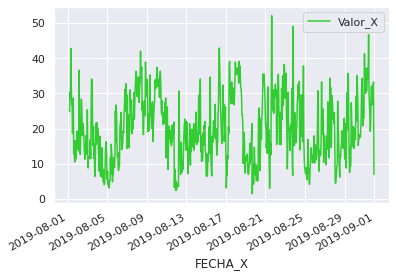

In [ ]:
#Gráfica de los datos  del sensor IOT con muestras = 31dias*24h
color = ['limegreen', '#bc15','indigo']
linestyle = ["-","."]
df_x.plot(color=color, style= linestyle )
df_X = df_x.fillna(" ")

Gráfica 

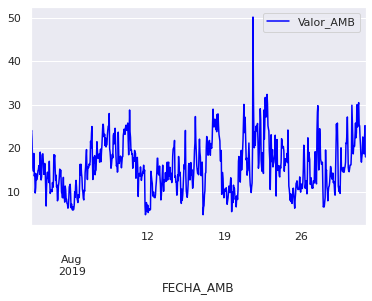

In [ ]:
#Gráfica de los datos  del estacipon AMB con muestras = 31dias*24h
color = ['blue', '#bc15','indigo']
linestyle = ["-","."]
df_AMB.plot(color=color, style= linestyle )
df_AMB = df_AMB.fillna(" ")

Aplicación de la ventana movil para promediar por h, 739 puntos en total. respectivas gráficas.

Distancia*h:  183.43384679863374


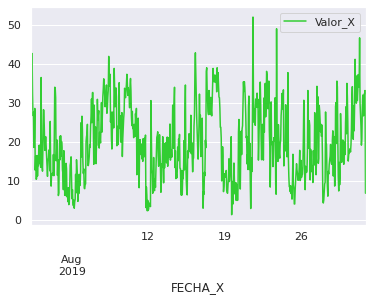

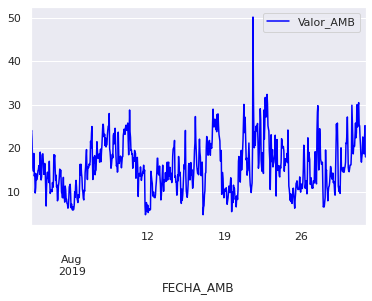

In [ ]:
df_AMBn=df_AMB.groupby(pd.Grouper(freq='h')).mean()
df_xn=df_x.groupby(pd.Grouper(freq='h')).mean()
color = ['limegreen', '#bc15','indigo']
linestyle = ["-","."]
df_xn.plot(color=color, style= linestyle )
df_xn = df_xn.fillna(" ")
color = ['blue', '#bc15','indigo']
linestyle = ["-","."]
df_AMBn.plot(color=color, style= linestyle )
df_AMBn = df_AMBn.fillna(" ")
 
 
Dif_valor = df_xn["Valor_X"] - df_AMBn["Valor_AMB"]
Dif_valor_2 = Dif_valor.pow(2).sum(axis=0)
type(Dif_valor_2)
v_final = np.sqrt(Dif_valor_2 )
print("Distancia*h: ", v_final)

Aplicación de la ventana movil para promediar por 3h, 247 puntos en total.

In [ ]:
df_AMBn=df_AMB.groupby(pd.Grouper(freq='3h')).mean()
df_xn=df_x.groupby(pd.Grouper(freq='3h')).mean()
color = ['limegreen', '#bc15','indigo']
linestyle = ["-","."]
df_xn.plot(color=color, style= linestyle )
df_xn = df_xn.fillna(" ")
color = ['blue', '#bc15','indigo']
linestyle = ["-","."]
df_AMBn.plot(color=color, style= linestyle )
df_AMBn = df_AMBn.fillna(" ")
df_xn.info()
df_AMBn.info()
 
Dif_valor = df_xn["Valor_X"] - df_AMBn["Valor_AMB"]
Dif_valor_2 = Dif_valor.pow(2).sum(axis=0)
type(Dif_valor_2)
v_final = np.sqrt(Dif_valor_2 )

print("Distanciax3h: ", v_final)


NameError: ignored

Aplicación de la ventana movil para promediar por 8h, 93 puntos en total.

In [ ]:
#df_AMB.info()
df_AMBn=df_AMB.groupby(pd.Grouper(freq='8h')).mean()
#df_x.info()
df_xn=df_x.groupby(pd.Grouper(freq='8h')).mean()
 
color = ['limegreen', '#bc15','indigo']
linestyle = ["-","."]
df_xn.plot(color=color, style= linestyle )
df_xn = df_xn.fillna(" ")
df_xn.info()
 
color = ['blue', '#bc15','indigo']
linestyle = ["-","."]
df_AMBn.plot(color=color, style= linestyle )
df_AMBn = df_AMBn.fillna(" ")
df_AMBn.info()
 
Dif_valor = df_xn["Valor_X"] - df_AMBn["Valor_AMB"]
Dif_valor_2 = Dif_valor.pow(2).sum(axis=0)
type(Dif_valor_2)
v_final = np.sqrt(Dif_valor_2 )
print("Distancia*8h: ", v_final)

NameError: ignored

Aplicación de la ventana movil para promediar por dia, 31 puntos en total.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2019-08-01 00:00:00+00:00 to 2019-08-31 00:00:00+00:00
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Valor_X  31 non-null     float64
dtypes: float64(1)
memory usage: 496.0 bytes
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2019-08-01 00:00:00+00:00 to 2019-08-31 00:00:00+00:00
Freq: D
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Valor_AMB  31 non-null     float64
dtypes: float64(1)
memory usage: 496.0 bytes
Distanciaxd:  26.57358043919514


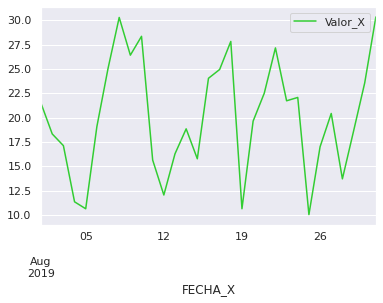

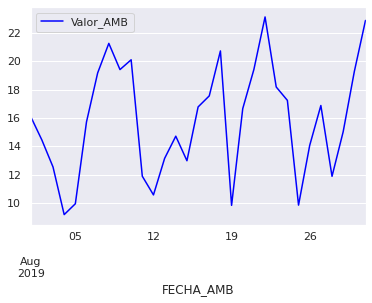

In [ ]:
df_AMBn=df_AMB.groupby(pd.Grouper(freq='d')).mean()
df_xn=df_x.groupby(pd.Grouper(freq='d')).mean()
color = ['limegreen', '#bc15','indigo']
linestyle = ["-","."]
df_xn.plot(color=color, style= linestyle )
df_xn = df_xn.fillna(" ")
color = ['blue', '#bc15','indigo']
linestyle = ["-","."]
df_AMBn.plot(color=color, style= linestyle )
df_AMBn = df_AMBn.fillna(" ")
df_xn.info()
df_AMBn.info()
 
Dif_valor = df_xn["Valor_X"] - df_AMBn["Valor_AMB"]
Dif_valor_2 = Dif_valor.pow(2).sum(axis=0)
type(Dif_valor_2)
v_final = np.sqrt(Dif_valor_2 )
print("Distanciaxd: ", v_final)

Aplicación de la ventana movil para promediar por 3 dias, 11 puntos en total.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 2019-08-01 00:00:00+00:00 to 2019-08-31 00:00:00+00:00
Freq: 3D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Valor_X  11 non-null     float64
dtypes: float64(1)
memory usage: 176.0 bytes
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 2019-08-01 00:00:00+00:00 to 2019-08-31 00:00:00+00:00
Freq: 3D
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Valor_AMB  11 non-null     float64
dtypes: float64(1)
memory usage: 176.0 bytes
Distanciax3d:  15.98341455771679


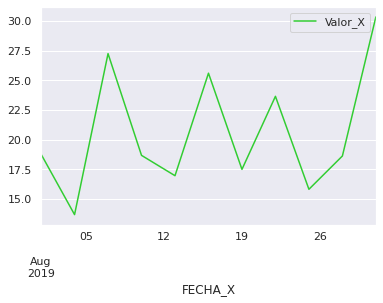

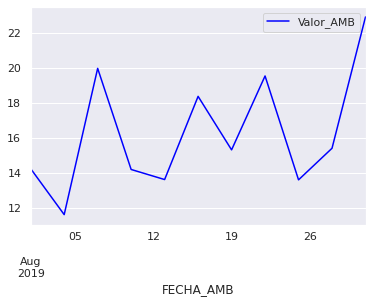

In [ ]:
df_AMBn=df_AMB.groupby(pd.Grouper(freq='3d')).mean()
df_xn=df_x.groupby(pd.Grouper(freq='3d')).mean()
color = ['limegreen', '#bc15','indigo']
linestyle = ["-","."]
df_xn.plot(color=color, style= linestyle )
df_xn = df_xn.fillna(" ")
color = ['blue', '#bc15','indigo']
linestyle = ["-","."]
df_AMBn.plot(color=color, style= linestyle )
df_AMBn = df_AMBn.fillna(" ")
df_xn.info()
df_AMBn.info()
 
Dif_valor = df_xn["Valor_X"] - df_AMBn["Valor_AMB"]
Dif_valor_2 = Dif_valor.pow(2).sum(axis=0)
type(Dif_valor_2)
v_final = np.sqrt(Dif_valor_2 )
print("Distanciax3d: ", v_final)

Aplicación de la ventana movil para promediar por semana, 4 puntos en total.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2019-08-04 00:00:00+00:00 to 2019-09-01 00:00:00+00:00
Freq: W-SUN
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Valor_X  5 non-null      float64
dtypes: float64(1)
memory usage: 80.0 bytes
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2019-08-04 00:00:00+00:00 to 2019-09-01 00:00:00+00:00
Freq: W-SUN
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Valor_AMB  5 non-null      float64
dtypes: float64(1)
memory usage: 80.0 bytes
Distanciaxsemana:  9.513262898075627


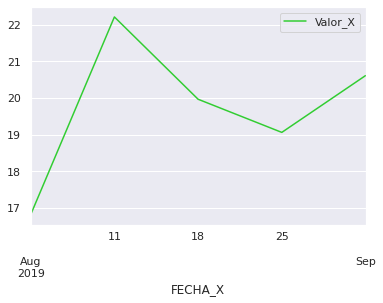

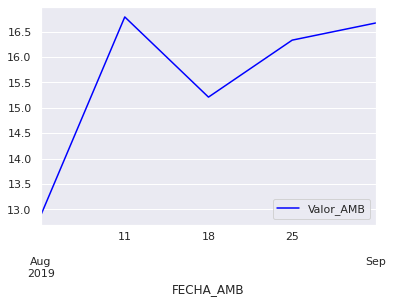

In [ ]:
df_AMBn=df_AMB.groupby(pd.Grouper(freq='w')).mean()
df_xn=df_x.groupby(pd.Grouper(freq='w')).mean()
color = ['limegreen', '#bc15','indigo']
linestyle = ["-","."]
df_xn.plot(color=color, style= linestyle )
df_xn = df_xn.fillna(" ")
color = ['blue', '#bc15','indigo']
linestyle = ["-","."]
df_AMBn.plot(color=color, style= linestyle )
df_AMBn = df_AMBn.fillna(" ")
df_xn.info()
df_AMBn.info()
 
Dif_valor = df_xn["Valor_X"] - df_AMBn["Valor_AMB"]
Dif_valor_2 = Dif_valor.pow(2).sum(axis=0)
type(Dif_valor_2)
v_final = np.sqrt(Dif_valor_2 )
print("Distanciaxsemana: ", v_final)